In [297]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc




In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
import sys
import sklearn
version = ".".join(map(str, sys.version_info[:3]))
print('Python version:', version)
print('sklearn version:', sklearn.__version__)

Python version: 3.10.12
sklearn version: 1.5.2


In [300]:
import io
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (5).csv
Saving test.csv to test (5).csv
Saving train.csv to train (5).csv


In [301]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_df = pd.read_csv('gender_submission.csv')

In [302]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [303]:
train_df.shape


(891, 12)

In [304]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [305]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [306]:
test_df.shape

(418, 11)

In [307]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [308]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [309]:
gender_df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [310]:
#check for null values in each df
print("Missing Values in Train:")
print(train_df.isnull().sum())

print("Missing Values in Test:")
print(test_df.isnull().sum())

print("Missing Values in Gender:")
print(gender_df.isnull().sum())


Missing Values in Train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing Values in Test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Missing Values in Gender:
PassengerId    0
Survived       0
dtype: int64


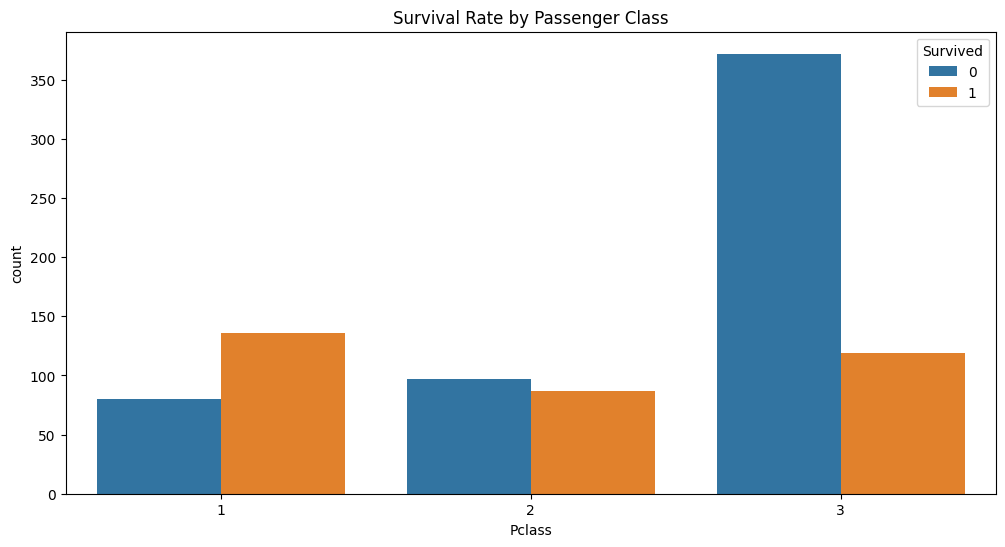

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [311]:
#examine survival rate by passenger class to understand the relationships
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

survival_by_class = train_df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Passenger Class:")
print(survival_by_class)

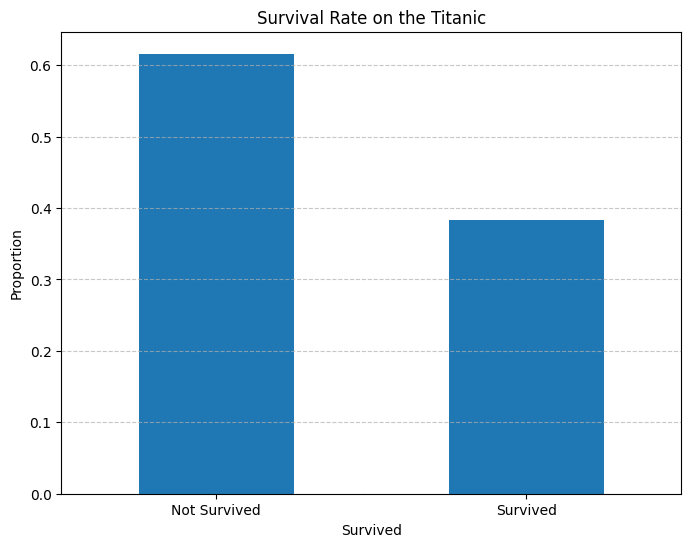

In [312]:
# Calculate survival rates
survival_counts = train_df['Survived'].value_counts(normalize=True)

# Plotting survival rates
plt.figure(figsize=(8, 6))
survival_counts.plot(kind='bar')
plt.title('Survival Rate on the Titanic')
plt.xlabel('Survived')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


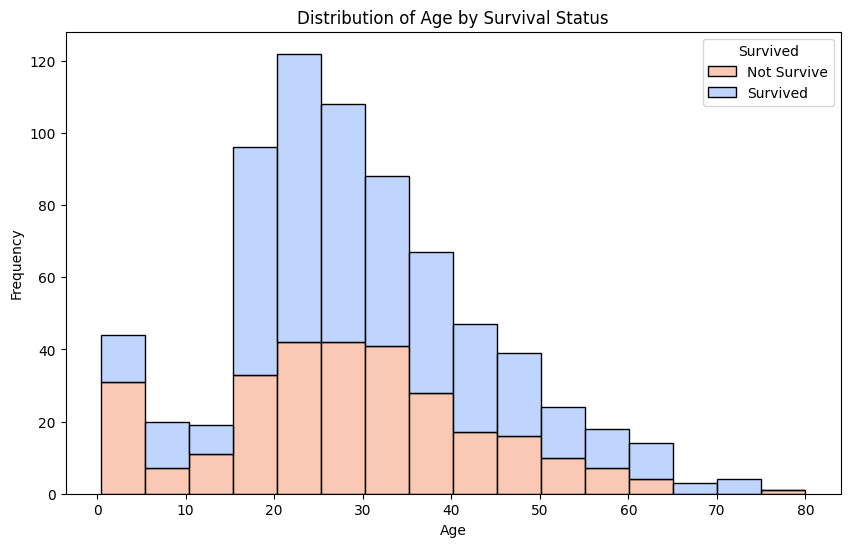

In [313]:
# Plot the distribution of 'Age' for passengers who survived and not survived
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', binwidth=5, palette='coolwarm', edgecolor='black')
plt.title('Distribution of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['Not Survive', 'Survived'])
plt.show()

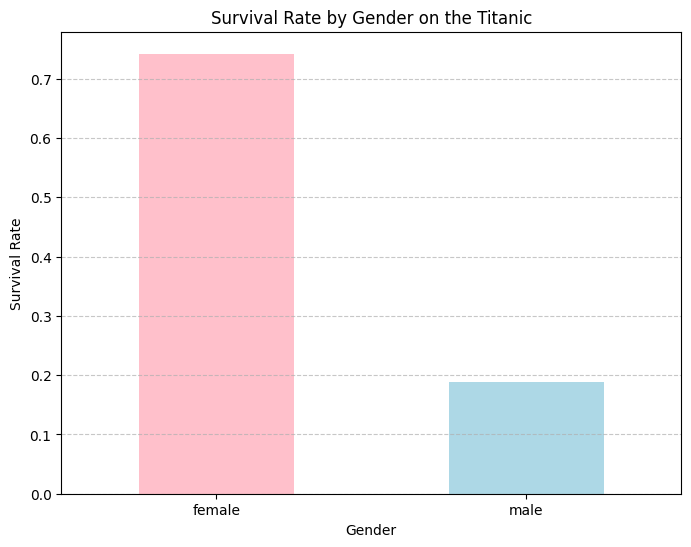

In [314]:
# Calculate survival rates by gender
survival_rate_by_gender = train_df.groupby('Sex')['Survived'].mean()

# Plotting survival rates by gender
plt.figure(figsize=(8, 6))
survival_rate_by_gender.plot(kind='bar', color=['pink','lightblue'])
plt.title('Survival Rate by Gender on the Titanic')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

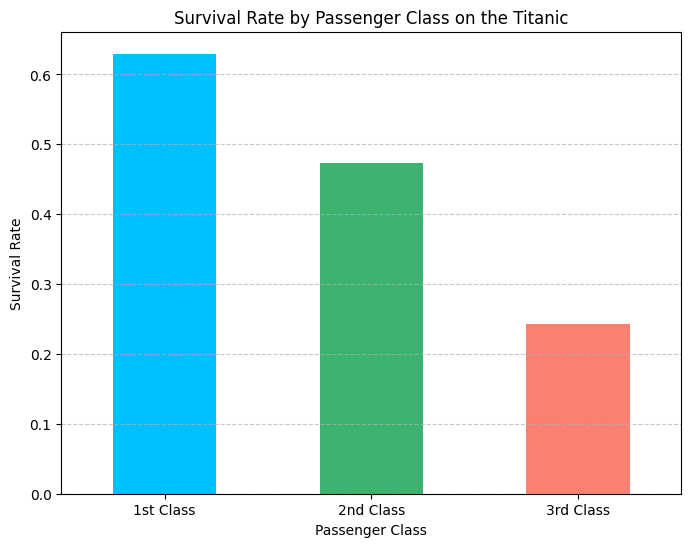

In [315]:
# Calculate survival rates by passenger class
survival_rate_by_class = train_df.groupby('Pclass')['Survived'].mean()

# Plotting survival rates by passenger class
plt.figure(figsize=(8, 6))
survival_rate_by_class.plot(kind='bar', color=['deepskyblue', 'mediumseagreen', 'salmon'])
plt.title('Survival Rate by Passenger Class on the Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

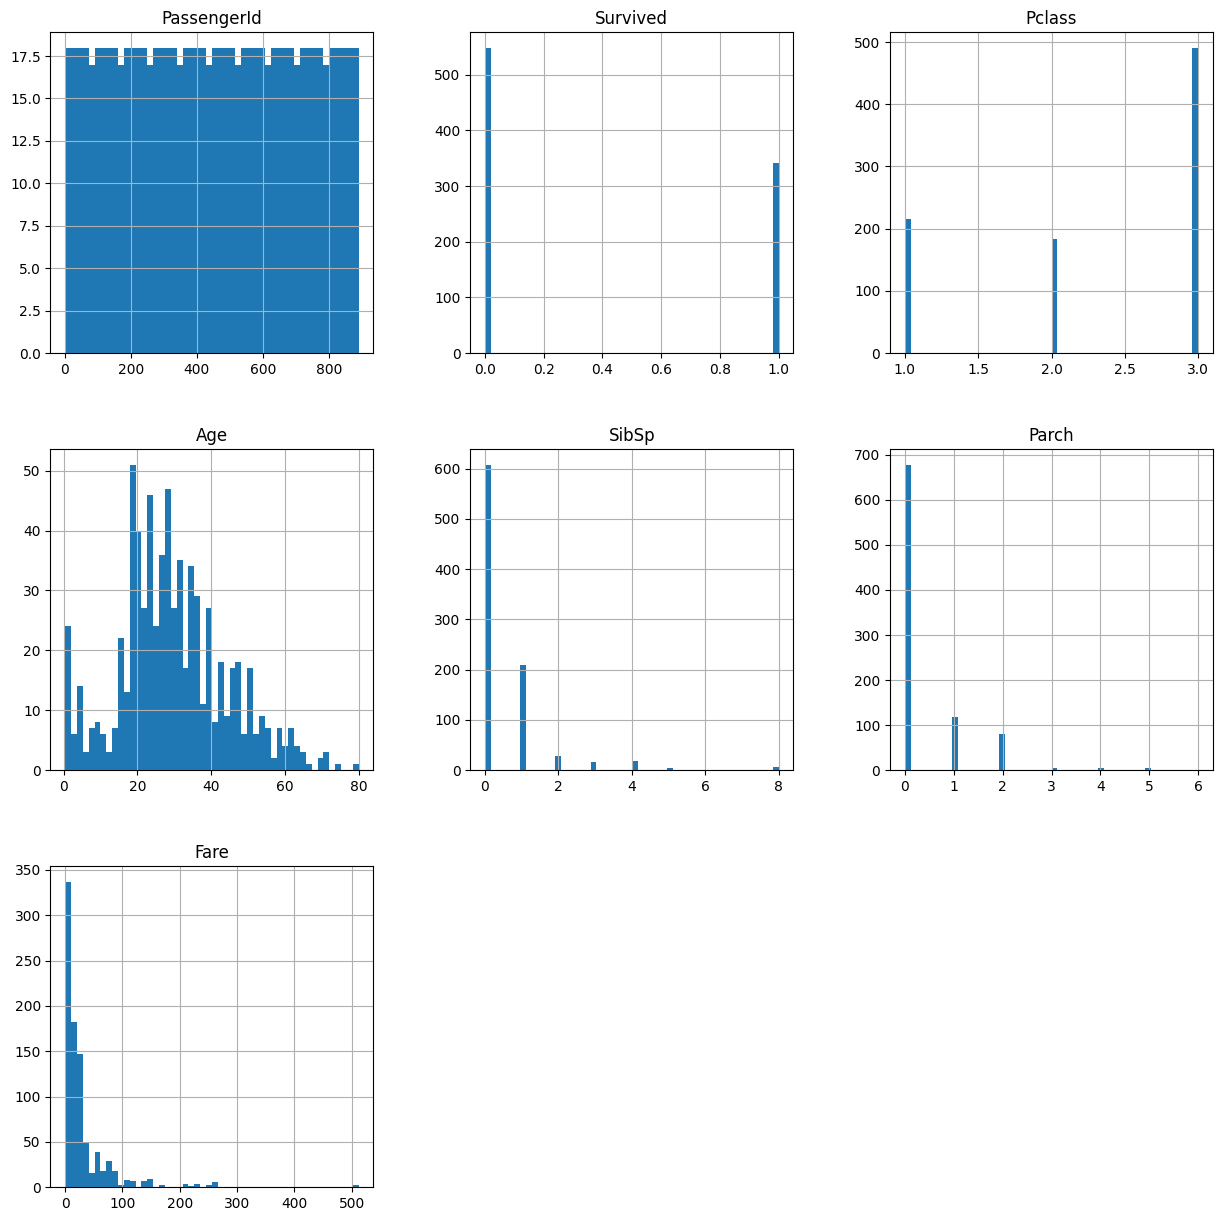

In [316]:

_ = train_df[train_df.columns].hist(bins=50, figsize=(15, 15))

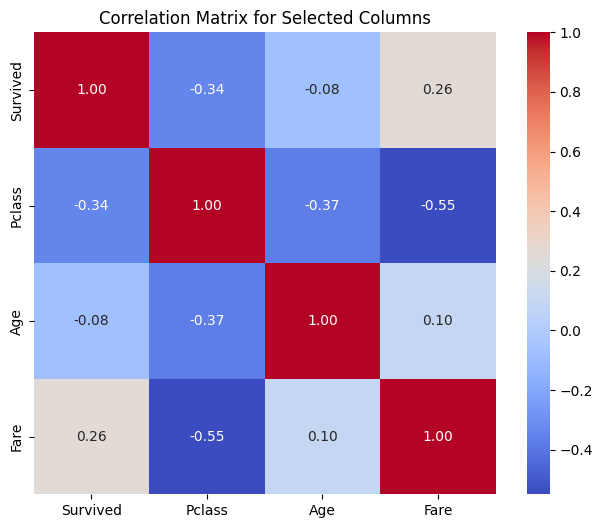

In [317]:
#correlation matrix for Survival, Pclass, Age, and Fare
selected_columns = ['Survived', 'Pclass', 'Age', 'Fare']
subset_df = train_df[selected_columns]

corr = subset_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Selected Columns')
plt.show()

Preprocessing Train data

In [318]:
# Preprocessing data
# Fill missing values for 'Age' and 'Embarked', drop 'Cabin'
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)


<ipython-input-318-05ed17e0ff4b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-318-05ed17e0ff4b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [319]:
# Encoding categorical data
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])


In [320]:
# Splitting the dataset into the Training set and Test set
x = train_df.drop(['Survived', 'Embarked'], axis=1)
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)



Preprocessing Test data

In [321]:
# Filling missing data with the median or mode
test_df['Age'].fillna(test_df['Age'].median())

test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


<ipython-input-321-07fef1b18427>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


In [322]:
# Encoding categorical data
label_encoder = LabelEncoder()
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])

In [323]:
# Retain PassengerId for submission purposes
passenger_ids = test_df['PassengerId'].copy()

# Select only the features used in the model
model_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_test = test_df[model_features]  # Now X_test contains only the features needed for prediction

In [324]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


**Logistic Regression**

In [325]:
logistic_model = LogisticRegression(random_state=0, max_iter=200)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=0)

In [326]:
# Create a df for displaying coefficients
coefficients = pd.DataFrame(data={'Feature': X_train.columns, 'Coefficient': logistic_model.coef_[0]})

# Calculate the odds ratios (exponential of the coefficients)
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])

# Sorting by absolute coefficients for better interpretability
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients)

  Feature  Coefficient  Odds Ratio
1     Sex    -2.605025    0.073901
0  Pclass    -0.995998    0.369354
3   SibSp    -0.379629    0.684115
4   Parch    -0.058595    0.943088
2     Age    -0.041771    0.959089
5    Fare     0.002343    1.002346


**Random Forest**

In [327]:
# Creating and fitting the Random Forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

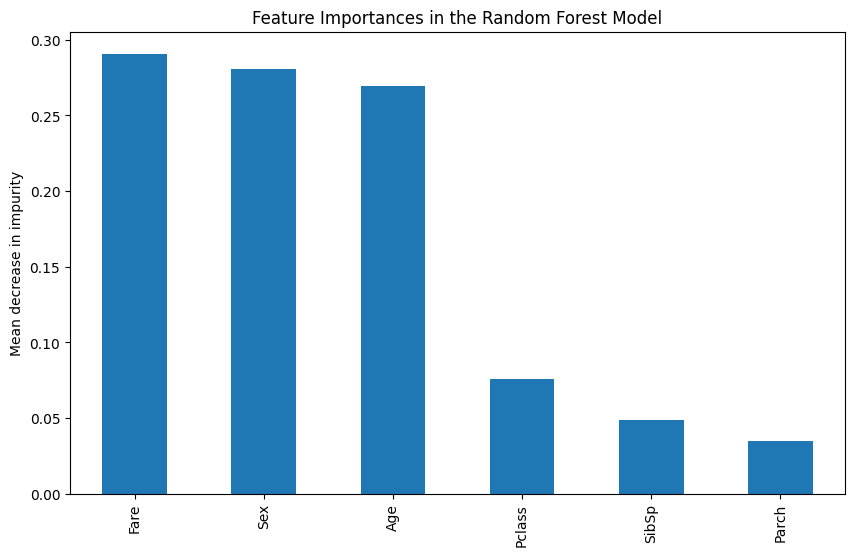

In [328]:
importances = forest_model.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plot feature importances
plt.figure(figsize=(10, 6))
forest_importances.sort_values(ascending=False).plot.bar()
plt.title('Feature Importances in the Random Forest Model')
plt.ylabel('Mean decrease in impurity')
plt.show()

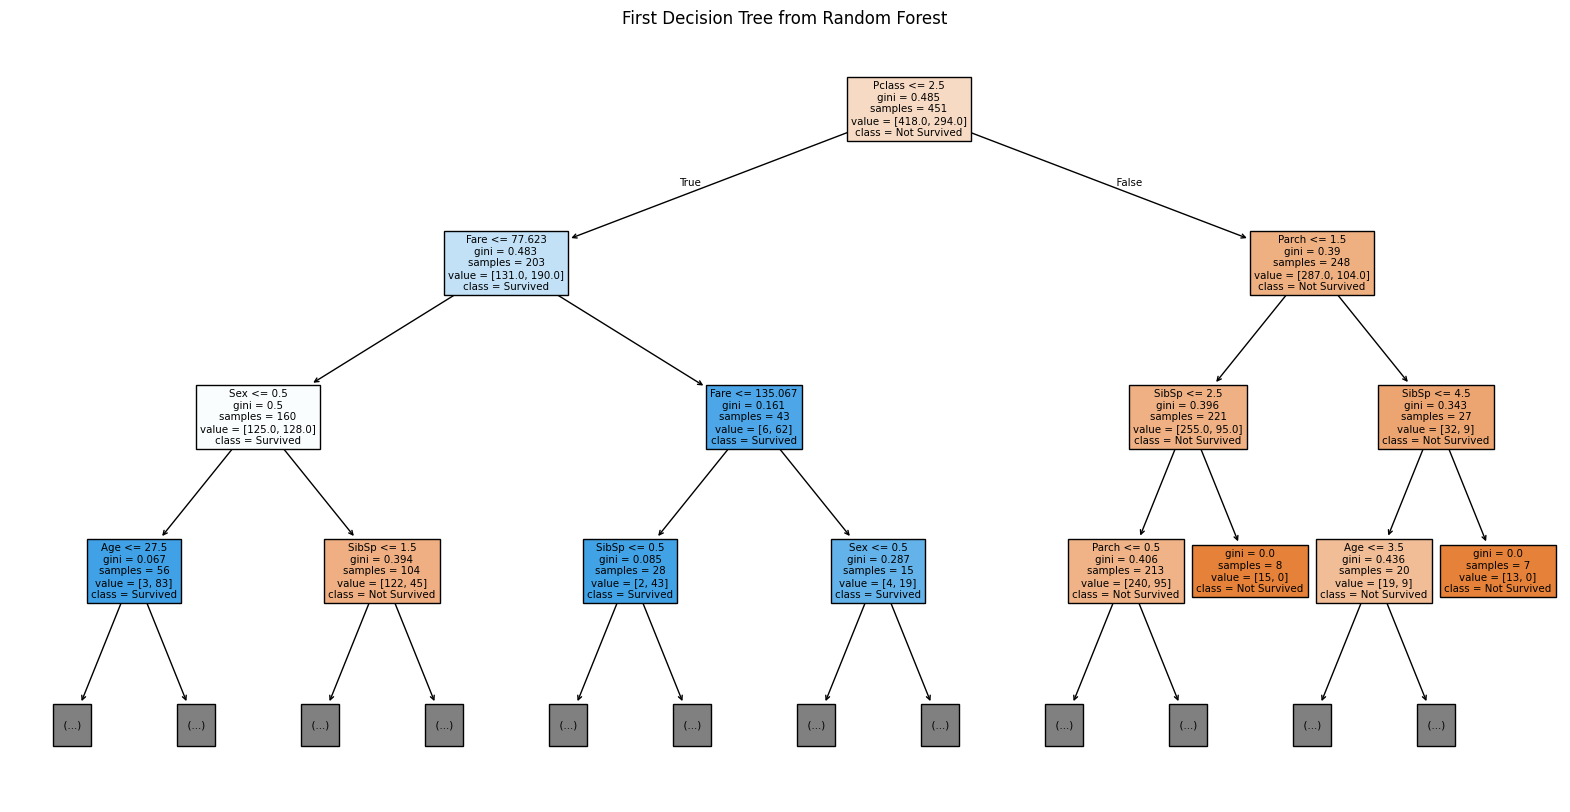

In [329]:


# Selecting the first tree from the random forest
single_tree = forest_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=feature_names, class_names=['Not Survived', 'Survived'], max_depth=3)
plt.title('First Decision Tree from Random Forest')
plt.show()


**Decision Tree**

In [330]:
# Creating and fitting the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [331]:
# Predicting the validation set results for Decision Tree
y_pred = tree_model.predict(X_val)

# Evaluating the Decision Tree
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7821229050279329


In [332]:
feature_importances = pd.DataFrame(tree_model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


        importance
Sex       0.308020
Fare      0.260545
Age       0.236881
Pclass    0.099426
SibSp     0.075091
Parch     0.020036


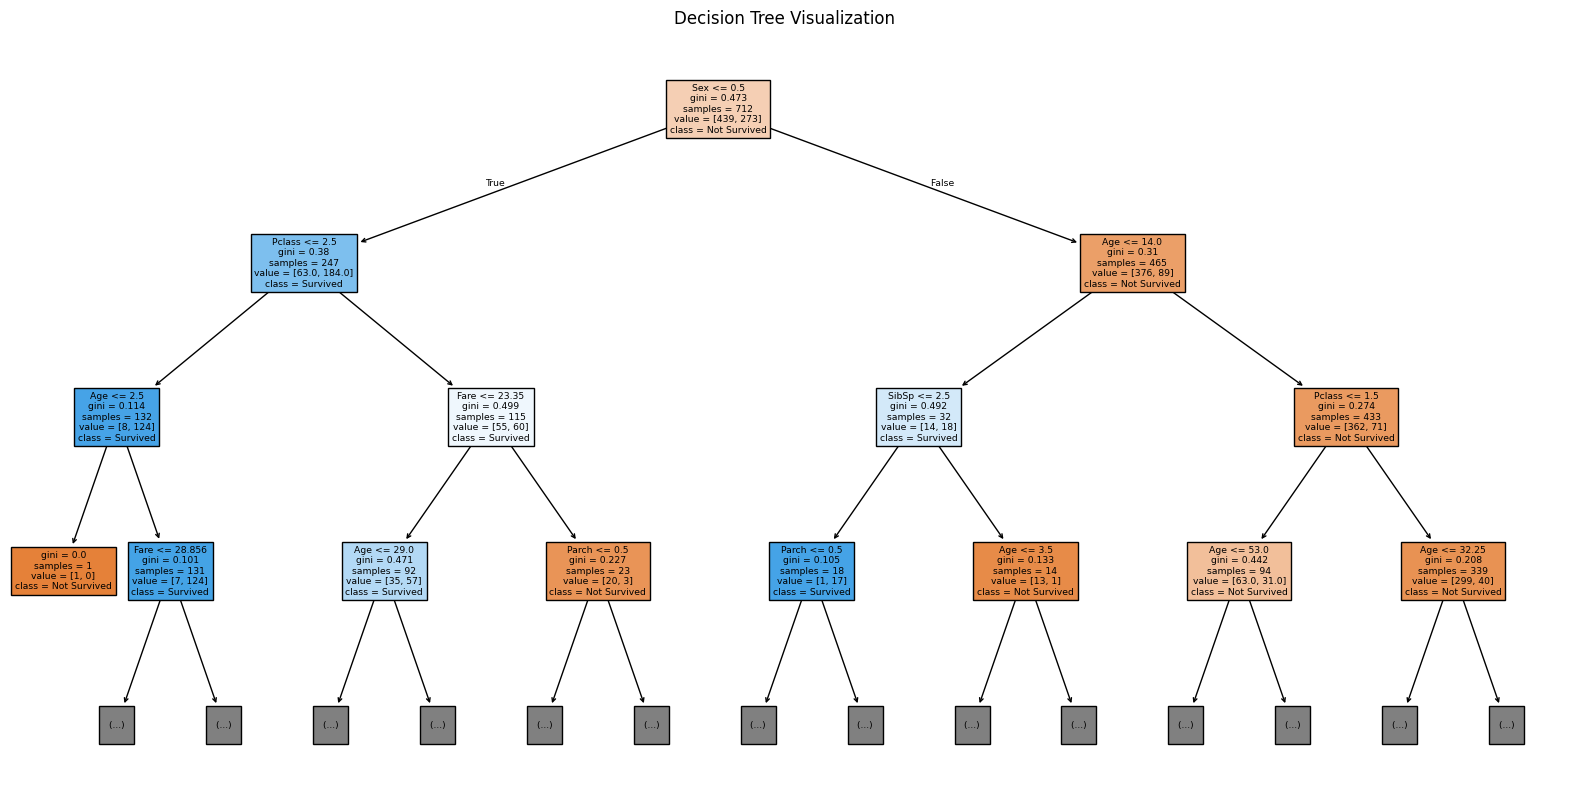

In [333]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

**Evaluate The Performance of Each Model**

In [334]:
# Predict probabilities for the positive class for each model
probs_tree = tree_model.predict_proba(X_val)[:, 1]
probs_logistic = logistic_model.predict_proba(X_val)[:, 1]
probs_forest = forest_model.predict_proba(X_val)[:, 1]




In [335]:
# Calculate ROC curve points
fpr_tree, tpr_tree, _ = roc_curve(y_val, probs_tree)
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, probs_logistic)
fpr_forest, tpr_forest, _ = roc_curve(y_val, probs_forest)


In [336]:
# Calculate AUC (Area Under the Curve)
auc_tree = auc(fpr_tree, tpr_tree)
auc_logistic = auc(fpr_logistic, tpr_logistic)
auc_forest = auc(fpr_forest, tpr_forest)



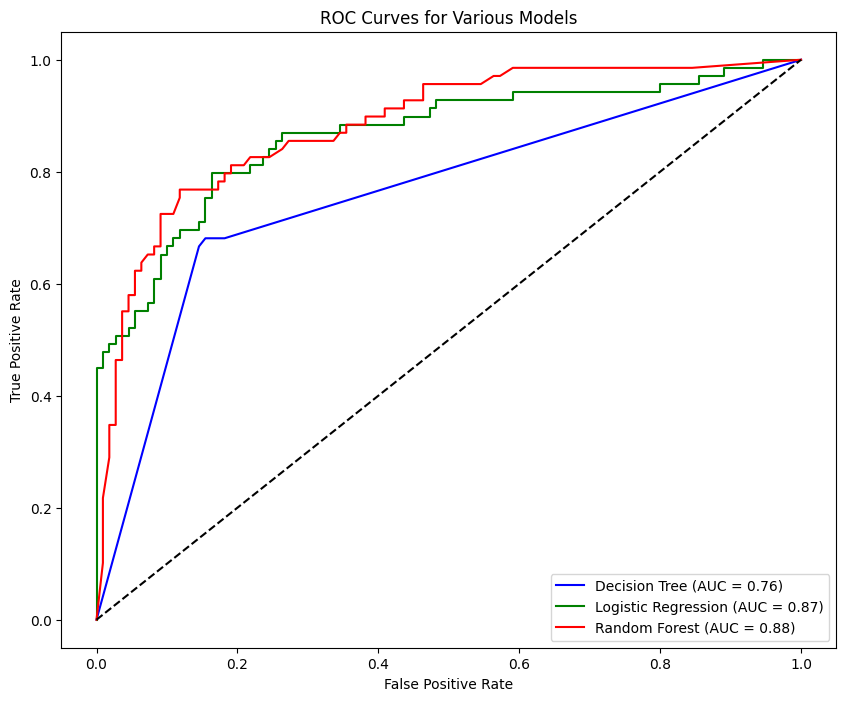

In [337]:
# Plotting all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})', color='blue')
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_logistic:.2f})', color='green')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {auc_forest:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line

# Adding labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()

Based on the evaluation, the model with the best performance is **Random Forest**, with the highest AUC value of 0.88.

**Evaluate Final Model (Random Forest)**




In [338]:
# Function to calculate AUC
def calculate_auc(model, X, y):
    # Predict probability for the positive class
    y_prob = model.predict_proba(X)[:, 1]
    # Calculate AUC
    return roc_auc_score(y, y_prob)

# Calculate AUC for each dataset
auc_train = calculate_auc(forest_model, X_train, y_train)
auc_val = calculate_auc(forest_model, X_val, y_val)



# Print the AUC values
print("AUC for Training Data:", auc_train)
print("AUC for Validation Data:", auc_val)



AUC for Training Data: 0.9976845477984431
AUC for Validation Data: 0.8833333333333335


Based on Passenger Class

In [339]:


def calculate_confusion_matrix_for_pclass(model, X_data, y_data, p_class):
    # Filter validation set for the current passenger class
    X_val_class = X_data[X_data['Pclass'] == p_class]
    y_val_class = y_data[X_data['Pclass'] == p_class]

    # Predict using the model
    y_pred_class = model.predict(X_val_class)

    # Calculate confusion matrix
    cm = confusion_matrix(y_val_class, y_pred_class)

    # Plotting the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for Passenger Class {p_class}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


    print(f"Confusion Matrix for Passenger Class {p_class}:\n{cm}\n")


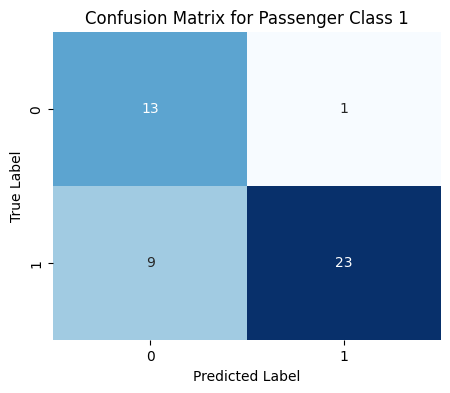

Confusion Matrix for Passenger Class 1:
[[13  1]
 [ 9 23]]



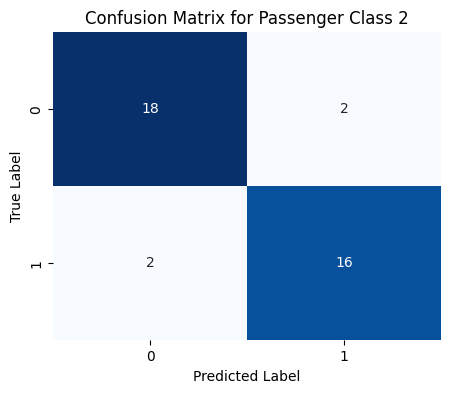

Confusion Matrix for Passenger Class 2:
[[18  2]
 [ 2 16]]



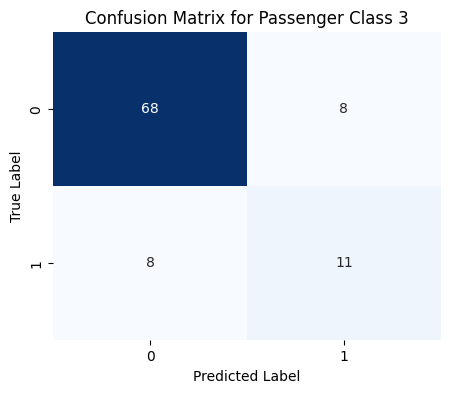

Confusion Matrix for Passenger Class 3:
[[68  8]
 [ 8 11]]



In [340]:

passenger_classes = X_val['Pclass'].unique()

for p_class in sorted(passenger_classes):
    calculate_confusion_matrix_for_pclass(forest_model, X_val, y_val, p_class)


In [341]:
def calculate_air_based_on_pclass(model, X_data, y_data, protected_column):
    groups = X_data[protected_column].unique()
    selection_rates = {}

    for group in groups:
        # Filter data for the group
        X_group = X_data[X_data[protected_column] == group]
        y_group = y_data.loc[X_group.index]

        # Predict using the model
        y_pred_group = model.predict(X_group)

        # Calculate selection rate (proportion of positive outcomes predicted)
        selection_rate = np.mean(y_pred_group == 1)
        selection_rates[group] = selection_rate

    # Find the group with the maximum selection rate to use as a baseline
    max_rate = max(selection_rates.values())
    baseline_group = [g for g, rate in selection_rates.items() if rate == max_rate][0]

    # Calculate AIR by comparing each group to the baseline
    air = {group: max_rate / rate for group, rate in selection_rates.items() if rate != 0}

    return air, baseline_group

# Calculate AIR for passenger classes
air, baseline = calculate_air_based_on_pclass(forest_model, X_val, y_val, 'Pclass')
print(f"Baseline Group: Passenger Class {baseline}")
for pclass, ratio in air.items():
    print(f"AIR for Passenger Class {pclass} compared to Class {baseline}: {ratio:.3f}")



Baseline Group: Passenger Class 1
AIR for Passenger Class 3 compared to Class 1: 2.609
AIR for Passenger Class 1 compared to Class 1: 1.000
AIR for Passenger Class 2 compared to Class 1: 1.101


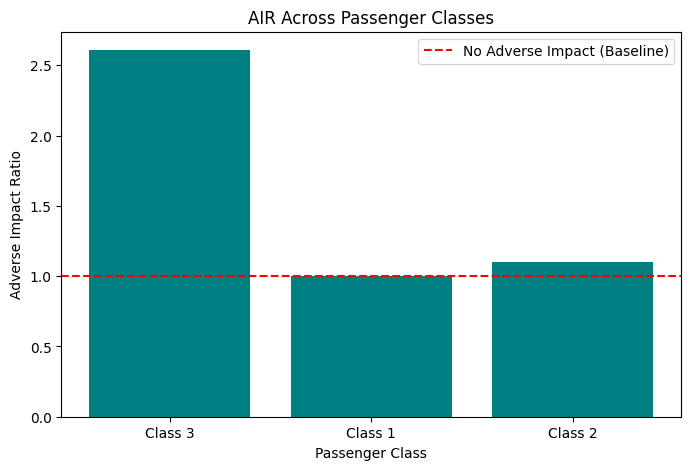

In [342]:

labels = [f'Class {pclass}' for pclass in air.keys()]
values = [air[pclass] for pclass in air.keys()]

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='teal')
plt.axhline(y=1, color='red', linestyle='--', label='No Adverse Impact (Baseline)')
plt.xlabel('Passenger Class')
plt.ylabel('Adverse Impact Ratio')
plt.title('AIR Across Passenger Classes')
plt.legend()

# Show the plot
plt.show()





Based on Gender

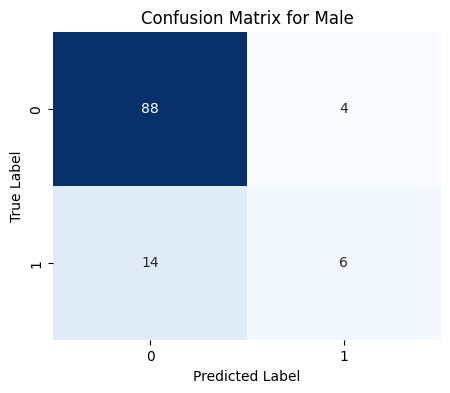

Confusion Matrix for Male:
[[88  4]
 [14  6]]



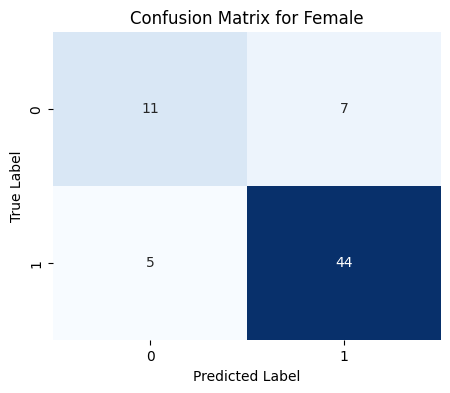

Confusion Matrix for Female:
[[11  7]
 [ 5 44]]



In [343]:
def calculate_confusion_matrix_for_gender(model, X_data, y_data, gender_column='Sex'):

    genders = X_data[gender_column].unique()
    gender_labels = {0: 'Female', 1: 'Male'}
    for gender in genders:
        # Filter data for the current gender
        X_gender = X_data[X_data[gender_column] == gender]
        y_gender = y_data.loc[X_gender.index]

        # Predict using the model
        y_pred_gender = model.predict(X_gender)

        # Calculate confusion matrix
        cm = confusion_matrix(y_gender, y_pred_gender)

        # Plotting the confusion matrix
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for {gender_labels[gender]}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        print(f"Confusion Matrix for {gender_labels[gender]}:\n{cm}\n")


calculate_confusion_matrix_for_gender(forest_model, X_val, y_val)


In [344]:
# Define function to calculate AIR based on gender

def calculate_air(model, X_data, y_data, protected_column, positive_outcome=True):
    # Split the data based on the protected attribute
    positive_group = X_data[X_data[protected_column] == 1]
    negative_group = X_data[X_data[protected_column] == 0]

    # Get survival predictions
    y_pred_pos = model.predict_proba(positive_group)[:, 1]
    y_pred_neg = model.predict_proba(negative_group)[:, 1]

    # Calculate selection rates
    if positive_outcome:
        selection_rate_positive = np.mean(y_pred_pos > 0.5)
        selection_rate_negative = np.mean(y_pred_neg > 0.5)
    else:
        selection_rate_positive = np.mean(y_pred_pos <= 0.5)
        selection_rate_negative = np.mean(y_pred_neg <= 0.5)

    # Calculate AIR
    air = selection_rate_negative / selection_rate_positive
    return air

# Use the function to calculate AIR for gender ('Sex')
air_sex = calculate_air(forest_model, X_val, y_val, 'Sex')



In [345]:
# Print the AIR value
print(f"Adverse Impact Ratio for Gender (Male to Female): {air_sex:.3f}")

Adverse Impact Ratio for Gender (Male to Female): 8.525


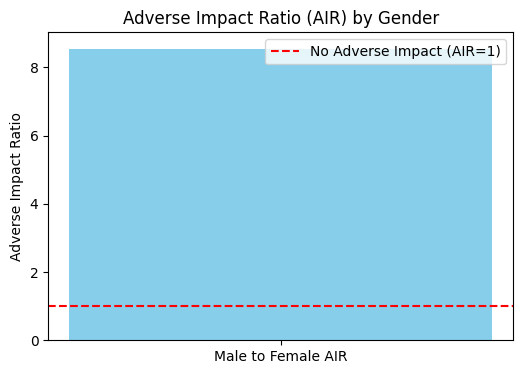

In [346]:
# Define labels and values for visualization
labels = ['Male to Female AIR']
values = [air_sex]

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color='skyblue')
plt.axhline(y=1, color='red', linestyle='--', label='No Adverse Impact (AIR=1)')
plt.ylim(0, max(values) + 0.5)
plt.ylabel('Adverse Impact Ratio')
plt.title('Adverse Impact Ratio (AIR) by Gender')
plt.legend()

# Show the plot
plt.show()


In [347]:
from joblib import dump


dump(forest_model, 'random_forest_model.joblib')



['random_forest_model.joblib']

In [348]:
from joblib import load

forest_model = load('random_forest_model.joblib')


In [349]:
predictions = forest_model.predict(X_test)


In [350]:
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})


In [351]:
submission_df.to_csv('submission.csv', index=False)